In [43]:
# Importing Relavant libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import datetime 
import plotly.graph_objects as go
import seaborn as sns

from matplotlib import pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing 

In [2]:
# Importing dataset and reading the data 
dataset = pd.read_csv('BrentOilPrices.csv')
dataset.head()

,Date,Price
0,"May 20, 1987",18.63
1,"May 21, 1987",18.45
2,"May 22, 1987",18.55
3,"May 25, 1987",18.60
4,"May 26, 1987",18.63


In [3]:
# Converting Date as DateTime variable 
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [4]:
# Filtering out data for the last 20 years and plotting on a graph 
def brentoil_price_trend(dataset, start_date, end_date):

    mask = (dataset['Date'] > start_date) & (dataset['Date'] <= end_date)
    sdf = dataset.loc[mask]
    plt.figure(figsize = (15,5))
    chart = sns.lineplot(x='Date',y='Price',data = sdf)
    plt.title("Brent Oil Price Trend over last 20 years ")

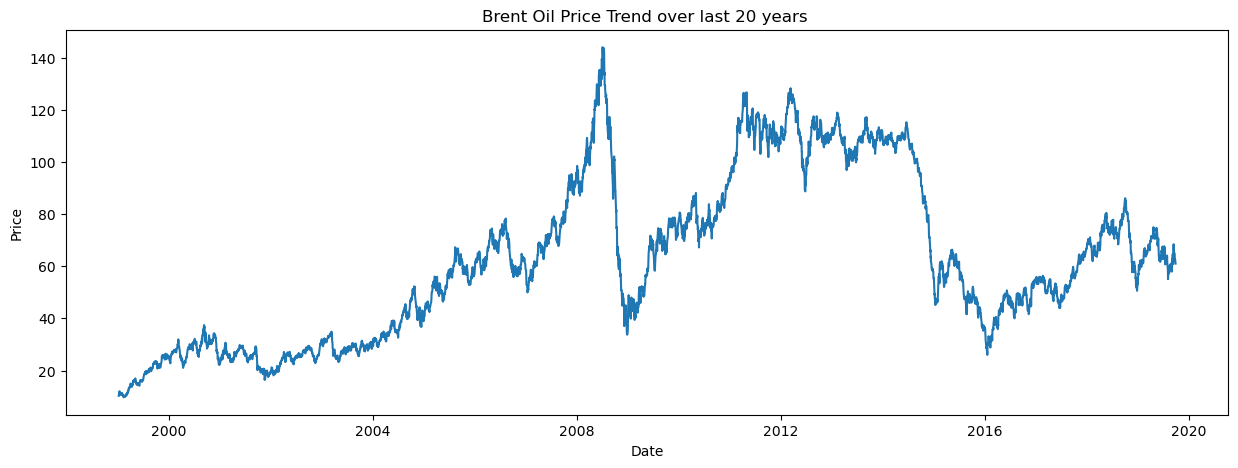

In [5]:
brentoil_price_trend(dataset,'1999-01-04','2019-09-30')

In [6]:
# Calculating the moving averages
dataset["MA3"] = dataset["Price"].rolling(window = 3).mean()
dataset["MA9"] = dataset["Price"].rolling(window = 9).mean()

In [7]:
dataset.head()

,Date,Price,MA3,MA9
0,1987-05-20,18.63,NaN,NaN
1,1987-05-21,18.45,NaN,NaN
2,1987-05-22,18.55,18.543333,NaN
3,1987-05-25,18.60,18.533333,NaN
4,1987-05-26,18.63,18.593333,NaN


In [8]:
# Dropping the NaN values
dataset = dataset.dropna()
dataset.head()

,Date,Price,MA3,MA9
8,1987-06-01,18.65,18.610000,18.587778
9,1987-06-02,18.68,18.636667,18.593333
10,1987-06-03,18.75,18.693333,18.626667
11,1987-06-04,18.78,18.736667,18.652222
12,1987-06-05,18.65,18.726667,18.657778


In [9]:
# Storing the feature variables to 'X' variable 
X = dataset[['MA3','MA9']]
# Setting-up the dependent variable too 'y' variable 
y = dataset['Price']
dataset.head()

,Date,Price,MA3,MA9
8,1987-06-01,18.65,18.610000,18.587778
9,1987-06-02,18.68,18.636667,18.593333
10,1987-06-03,18.75,18.693333,18.626667
11,1987-06-04,18.78,18.736667,18.652222
12,1987-06-05,18.65,18.726667,18.657778


In [10]:
X.head()

,MA3,MA9
8,18.610000,18.587778
9,18.636667,18.593333
10,18.693333,18.626667
11,18.736667,18.652222
12,18.726667,18.657778


In [11]:
y.head()

8     18.65
9     18.68
10    18.75
11    18.78
12    18.65
Name: Price, dtype: float64

In [12]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Creating coefficient and constant for LR
Lreg = LinearRegression().fit(X_train,y_train)

In [29]:
# Making predictions on test data
y_predict = Lreg.predict(X_test)

In [31]:
# calculate the mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predict)
print("Mean Squared Error: ", mse)

Mean Squared Error:  0.5189501150541574


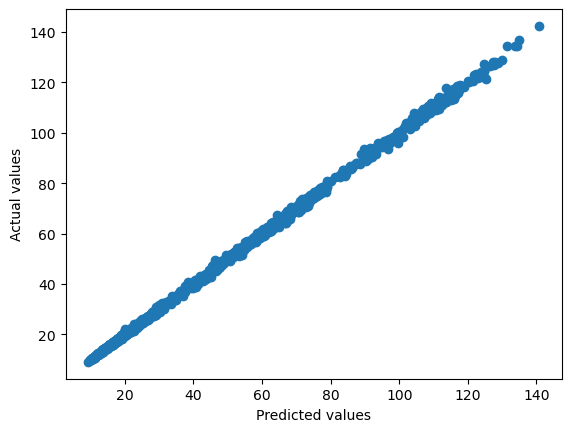

In [41]:
# Visualizing predictions vs actual values
plt.scatter(y_predict, y_test)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

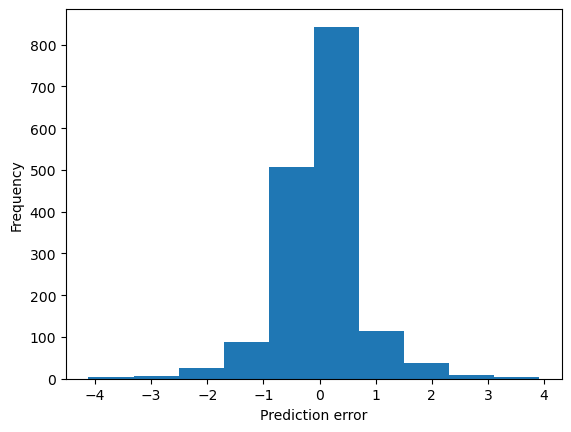

In [42]:
# Visualize predictions versus actual values using a histogram
plt.hist(y_predict - y_test)
plt.xlabel("Prediction error")
plt.ylabel("Frequency")
plt.show()

In [44]:
# Calculate alpha and betas
alpha = reg.intercept_
beta = reg.coef_

In [45]:
alpha

0.027472299010000256

In [47]:
beta

array([ 1.22549343, -0.22610689])